In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import pickle as pk
colors = ['royalblue','red','deeppink','maroon','mediumorchid','tan','forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [33]:
dataset = pd.read_csv("dataset.csv")
X = dataset[['1 Kesedihan','2 Pesimis','3 Kegagalan Lalu','4 Hilang Kepuasan','5 Rasa Bersalah','6 Rasa Dihukum','7 Tidak suka diri sendiri','8 Kritik diri sendiri','9 Fikir untuk bunuh diri','10 Menangis','11 Sakit hati','12 Hilang minat','13 Sukar buat keputusan','14 Tak berguna','15 Hilang tenaga','16 Perubahan tidur','17 Terganggu','18 Perubahan selera','19 Masalah berat badan','20 Risau keadaan fizikal']]
y = dataset["Label"]

In [40]:
y.describe

<bound method NDFrame.describe of 0      3
1      3
2      3
3      3
4      3
      ..
315    0
316    0
317    0
318    0
319    0
Name: Label, Length: 320, dtype: int64>

In [34]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X,y).transform(X)

In [35]:
scores = cross_val_score(lda, X, y, cv=48)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.87 (+/- 0.23)


In [36]:
lda.explained_variance_ratio_

array([0.97843638, 0.01570872])

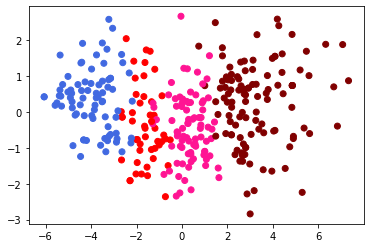

In [37]:
plt.scatter(X_r2[:,0],X_r2[:,1], c=vectorizer(y))

In [38]:
filename = "depression_model.sav"
pk.dump(lda, open(filename, 'wb'))